<hr>
<a id='top'></a> 
###  Table of Contents

## <a href='#data_wrangling'>2. Data Wrangling</a>

## <a href='#eda'>3. EDA and Data Storytelling</a>

## <a href='#machine_learning'>4. Machine Learning</a>

### <a href='#knn'>4.1. k-Nearest Neighbor Classifier</a>


<hr>
## <a id='data_wrangling'>2. Data Wrangling</a> 

In [4]:
# IMPORT PACKAGES
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [5]:
# GETTING PLAYLISTS FROM READ_EXCEL
liked = pd.read_excel('Google Drive/Springboard/Capstone1/LIKES.xlsx')
disliked = pd.read_excel('Google Drive/Springboard/Capstone1/DISLIKES.xlsx')
tophits = pd.read_excel('Google Drive/Springboard/Capstone1/TOP_HITS.xlsx')

### 2.3.1. Dropping Null Values

In [6]:
liked = liked.dropna().reset_index(drop=True)
disliked = disliked.dropna().reset_index(drop=True)
tophits = tophits.dropna().reset_index(drop=True)

### 2.3.2. , 2.3.3. , 2.3.4,  Changing Column Names , Data Types, Date/Time Conversions

In [7]:
# CHANGE COLUMN NAME FROM 'POP.' TO 'POPULARITY'
liked = liked.rename(columns=lambda x: x.replace('POP.', 'POPULARITY'))
disliked = disliked.rename(columns=lambda x: x.replace('POP.', 'POPULARITY'))
tophits = tophits.rename(columns=lambda x: x.replace('POP.', 'POPULARITY'))

# ADD 'YEAR' COLUMN FROM 'RELEASE' COLUMN & CONVERT OBJECT TYPE TO NUMERIC TYPE
liked['YEAR'] = liked['RELEASE'].astype(str).str[0:4]
liked['YEAR'] = liked['YEAR'].convert_objects(convert_numeric=True)

disliked['YEAR'] = disliked['RELEASE'].astype(str).str[0:4]
disliked['YEAR'] = disliked['YEAR'].convert_objects(convert_numeric=True)

tophits['YEAR'] = tophits['RELEASE'].astype(str).str[0:4]
tophits['YEAR'] = tophits['YEAR'].convert_objects(convert_numeric=True)

# OBJECT TYPE INTO NUMERIC TYPE IN 'LENGTH' COLUMN 
liked['MINUTES'] = liked['LENGTH'].astype(str).str[0:2].convert_objects(convert_numeric=True)
liked['SECONDS'] = liked['LENGTH'].astype(str).str[3:5].convert_objects(convert_numeric=True)

disliked['MINUTES'] = disliked['LENGTH'].astype(str).str[0:2].convert_objects(convert_numeric=True)
disliked['SECONDS'] = disliked['LENGTH'].astype(str).str[3:5].convert_objects(convert_numeric=True)

tophits['MINUTES'] = tophits['LENGTH'].astype(str).str[0:2].convert_objects(convert_numeric=True)
tophits['SECONDS'] = tophits['LENGTH'].astype(str).str[3:5].convert_objects(convert_numeric=True)

# CONVERT MINUTES TO SECONDS & ADD 'DURATION' COLUMN, DROP 'LENGTH', 'MINUTES', 'SECONDS', AND 'RELEASE' COLUMNS
liked['DURATION'] = liked['MINUTES'] * 60 + liked['SECONDS']
liked = liked.drop(['LENGTH','MINUTES', 'SECONDS', 'RELEASE'], 1)

disliked['DURATION'] = disliked['MINUTES'] * 60 + disliked['SECONDS']
disliked = disliked.drop(['LENGTH','MINUTES', 'SECONDS', 'RELEASE'], 1)

tophits['DURATION'] = tophits['MINUTES'] * 60 + tophits['SECONDS']
tophits = tophits.drop(['LENGTH','MINUTES', 'SECONDS', 'RELEASE'], 1)


/Users/ahipolito94/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  
/Users/ahipolito94/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  # This is added back by InteractiveShellApp.init_path()
/Users/ahipolito94/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  
/Users/ahipolito94/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/Users/ahipolito94/anaconda/lib/python3.6/site-packages/ipykernel

<hr>
## <a id='eda'>3. EDA and Data Storytelling</a> 

### 3.1. Means and Standard Deviations

In [8]:
# GET DESCRIBE VALUES
d1 = liked.describe()
d2 = disliked.describe()
d3 = tophits.describe()

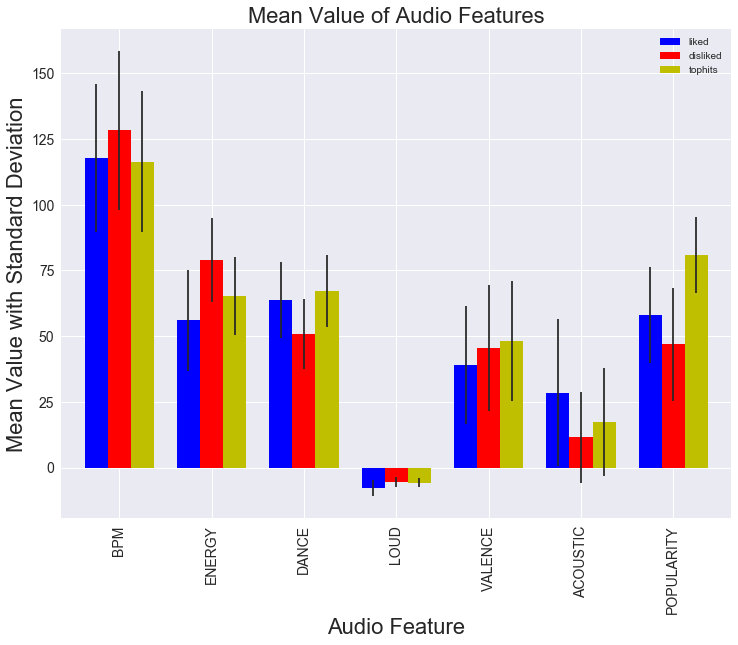

In [9]:
sns.set()

# GET CURRENT SIZE
fig_size = plt.rcParams['figure.figsize']
 
# SET WIDTH AND HEIGHT
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams['figure.figsize'] = fig_size

# GROUPED BAR PLOTS
avgs = pd.concat([d1.iloc[1,:7].rename('liked'), 
                  d2.iloc[1,:7].rename('disliked'), 
                  d3.iloc[1,:7].rename('tophits')], axis=1).plot(kind='bar', 
                                                                 width=.75, 
                                                                 fontsize=14,
                                                                 yerr=[d1.iloc[2,:7], 
                                                                       d2.iloc[2,:7], 
                                                                       d3.iloc[2,:7]],
                                                                 color=['b','r','y'])

# SET TITLE AND LABELS 
avgs.set_title('Mean Value of Audio Features', fontsize=22)
avgs.set_xlabel('Audio Feature', fontsize=22)
avgs.set_ylabel('Mean Value with Standard Deviation', fontsize=22)

plt.show()

### 3.2. Distributions: Liked vs. Disliked Songs

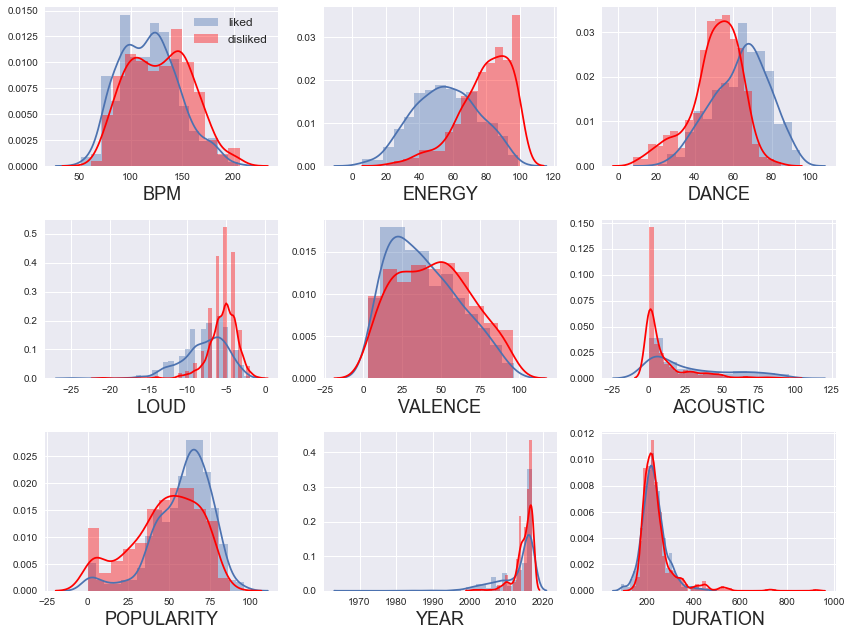

In [10]:
# USE SEABORN'S DISTRIBUTION PLOT
plt.subplot(331)
sns.distplot(liked.BPM, label='liked')
sns.distplot(disliked.BPM, color='r', label='disliked')
plt.xlabel('BPM', fontsize=18)
plt.legend(fontsize=12)

plt.subplot(332)
sns.distplot(liked.ENERGY)
sns.distplot(disliked.ENERGY, color='r')
plt.xlabel('ENERGY', fontsize=18)

plt.subplot(333)
sns.distplot(liked.DANCE)
sns.distplot(disliked.DANCE, color='r')
plt.xlabel('DANCE', fontsize=18)

plt.subplot(334)
sns.distplot(liked.LOUD)
sns.distplot(disliked.LOUD, color='r')
plt.xlabel('LOUD', fontsize=18)

plt.subplot(335)
sns.distplot(liked.VALENCE)
sns.distplot(disliked.VALENCE, color='r')
plt.xlabel('VALENCE', fontsize=18)

plt.subplot(336)
sns.distplot(liked.ACOUSTIC)
sns.distplot(disliked.ACOUSTIC, color='r')
plt.xlabel('ACOUSTIC', fontsize=18)

plt.subplot(337)
sns.distplot(liked.POPULARITY)
sns.distplot(disliked.POPULARITY, color='r')
plt.xlabel('POPULARITY', fontsize=18)

plt.subplot(338)
sns.distplot(liked.YEAR)
sns.distplot(disliked.YEAR, color='r')
plt.xlabel('YEAR', fontsize=18)

plt.subplot(339)
sns.distplot(liked.DURATION)
sns.distplot(disliked.DURATION, color='r')
plt.xlabel('DURATION', fontsize=18)

plt.tight_layout()
plt.show()


### 3.3. Distributions: Liked vs. Today's Top Hits Songs

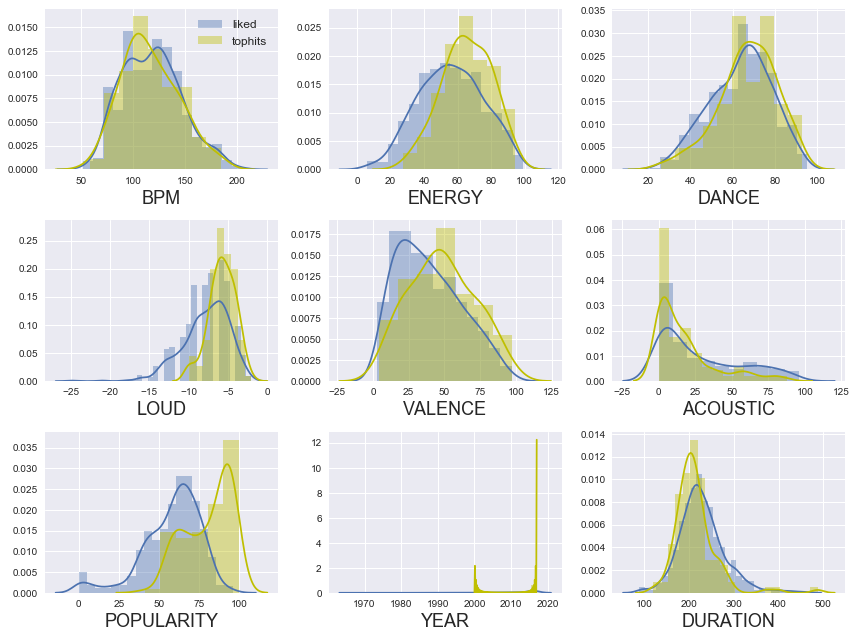

In [11]:
plt.subplot(331)
sns.distplot(liked.BPM, label='liked')
sns.distplot(tophits.BPM, color='y', label='tophits')
plt.xlabel('BPM', fontsize=18)
plt.legend(fontsize=12)

plt.subplot(332)
sns.distplot(liked.ENERGY)
sns.distplot(tophits.ENERGY, color='y')
plt.xlabel('ENERGY', fontsize=18)

plt.subplot(333)
sns.distplot(liked.DANCE)
sns.distplot(tophits.DANCE, color='y')
plt.xlabel('DANCE', fontsize=18)

plt.subplot(334)
sns.distplot(liked.LOUD)
sns.distplot(tophits.LOUD, color='y')
plt.xlabel('LOUD', fontsize=18)

plt.subplot(335)
sns.distplot(liked.VALENCE)
sns.distplot(tophits.VALENCE, color='y')
plt.xlabel('VALENCE', fontsize=18)

plt.subplot(336)
sns.distplot(liked.ACOUSTIC)
sns.distplot(tophits.ACOUSTIC, color='y')
plt.xlabel('ACOUSTIC', fontsize=18)

plt.subplot(337)
sns.distplot(liked.POPULARITY)
sns.distplot(tophits.POPULARITY, color='y')
plt.xlabel('POPULARITY', fontsize=18)

plt.subplot(338)
sns.distplot(liked.YEAR)
sns.distplot(tophits.YEAR, color='y')
plt.xlabel('YEAR', fontsize=18)

plt.subplot(339)
sns.distplot(liked.DURATION)
sns.distplot(tophits.DURATION, color='y')
plt.xlabel('DURATION', fontsize=18)

plt.tight_layout()
plt.show()


<hr>
## <a id='machine_learning'>4. Machine Learning</a>

#### Data Wrangling

In [14]:
# IMPORT PACKAGES
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, classification_report, confusion_matrix,
                             roc_auc_score, roc_curve, matthews_corrcoef)
from sklearn.utils import resample

# ADD TARGET COLUMN, 1 FOR LIKED SONGS, 0 FOR DISLIKED SONGS
liked['TARGET'] = 1
disliked['TARGET'] = 0

# COMBINE LIKED and DISLIKED PLAYLIST
combined = pd.concat([liked,disliked], ignore_index=True)

In [15]:
print('Liked Count:', len(liked))
print('Disliked Count:', len(disliked))

Liked Count: 620
Disliked Count: 529


#### Handle Imbalanced Data - Upsample Minority Class (Disliked)

In [16]:
# UPSAMPLING MINORITY CLASS (DISLIKED)

# SEPARATE MAJORITY AND MINORITY CLASSES
df_majority = combined[combined.TARGET==1]
df_minority = combined[combined.TARGET==0]
 
# UPSAMPLE MINORITY CLASS
df_minority_up = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=620,    # to match majority class
                                 random_state=123) # reproducible results
 
# COMBINED MAJORITY CLASS WITH UPSAMPLED MINORITY CLASS
df_upsampled = pd.concat([df_majority, df_minority_up])
 
# Display new class counts
df_upsampled.TARGET.value_counts()

1    620
0    620
Name: TARGET, dtype: int64

#### Create Features / Target Variables

In [17]:
# FEATURES & TARGET VARIABLE
features = df_upsampled[['BPM','ENERGY','DANCE','LOUD','VALENCE','ACOUSTIC','POPULARITY']]
target = df_upsampled['TARGET']

#### Create Training / Testing Data

In [18]:
# TRAINING / TESTING DATA
X_train, X_test, y_train, y_test = train_test_split(features, target)
print('Features Training Set:', X_train.shape, 'Features Testing Set:', X_test.shape)
print('Target Training Set:', y_train.shape, 'Target Testing Set:', y_test.shape)

Features Training Set: (930, 7) Features Testing Set: (310, 7)
Target Training Set: (930,) Target Testing Set: (310,)


<hr>
### <a id='knn'>4.1. k-Nearest Neighbor Classifier</a>

#### Hyperparameter Tuning - Finding k

In [19]:
# GRID SEARCH
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(features, target)

print(knn_cv.best_params_)
print(knn_cv.best_score_)

{'n_neighbors': 1}
0.816129032258


#### Applying k-NN Classifier

In [20]:
# SETUP K-NN CLASSIFIER K=1
knn = KNeighborsClassifier(n_neighbors=1)

# FIT CLASSIFIER W/ K NEIGHBORS TO TRAINING DATA
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

#### ROC Curve

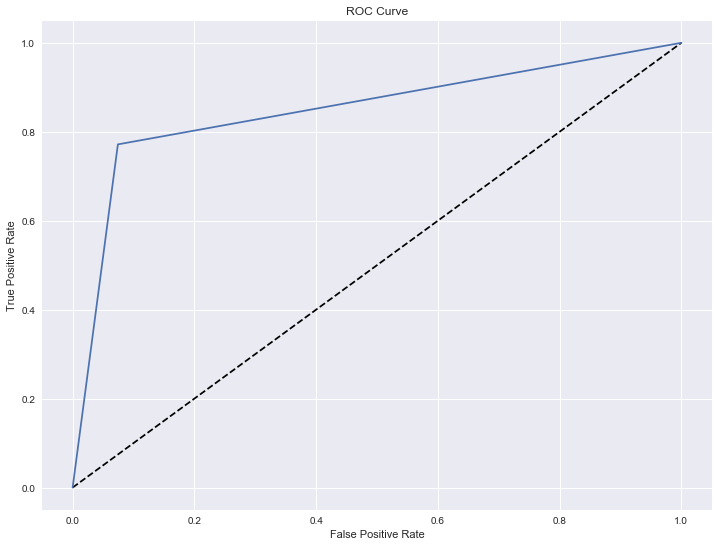

In [21]:
# ROC CURVE
y_pred_prob = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

#### Metrics: Accuracy Score, AUROC, Classification Report & Confusion Matrix

In [32]:
# METRICS
print('Accuracy Score:', accuracy_score(y_test, y_pred))
y_pred_prob = knn.predict_proba(X_test)[:,1]
print('AUROC Score:',roc_auc_score(y_test, y_pred_prob))
print('MCC:', matthews_corrcoef(y_test, y_pred))
print('\n Clasification Report:\n', classification_report(y_test, y_pred))
cm =  confusion_matrix(y_test, y_pred)
print('\n Confusion Matrix:\n', cm)


Accuracy Score: 0.845161290323
AUROC Score: 0.848640306974
MCC: 0.701862239169

 Clasification Report:
              precision    recall  f1-score   support

          0       0.79      0.93      0.85       148
          1       0.92      0.77      0.84       162

avg / total       0.86      0.85      0.84       310


 Confusion Matrix:
 [[137  11]
 [ 37 125]]


In [25]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_y_pred = logreg.predict(X_test)

<hr>

## <a href='#top'>Back to Top ^</a>

<hr>